<a href="https://colab.research.google.com/github/EvgeniaKantor/EvgeniaKantor/blob/main/Cosmetic_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

In [54]:
#read excel
df = pd.read_excel('Cosmetic_startups.xlsx')

In [16]:
df.columns

Index(['№', 'Name', 'Web site', 'Business Model', 'About', 'Founded',
       'Employees', 'Business', 'What', 'For whom', 'Products', 'Adress',
       'City', 'Latitude', 'Longitude'],
      dtype='object')

In [44]:
import pandas as pd
import re

# Function to extract city from address
def extract_city(address):
    # Check if ', Israel' is in the address
    if ', Israel' in address:
        # Extract the part before ', Israel'
        address = address.split(', Israel')[0].strip()
    else:
        # If ', Israel' is not found, extract the last part (city)
        parts = address.split(',')
        address = parts[-2].strip() if len(parts) > 1 else parts[-1].strip()

    # After removing street details, return the last part as the city name
    city = address.split(',')[-1].strip()

    # Remove numeric strings or other non-city entries (you can modify this check)
    if re.match(r'^\d+$', city):  # This removes purely numeric strings (e.g., "2017400")
        return None

    # Further filter out addresses that are likely non-city (e.g., organization names)
    # You could also validate against a list of cities here if available
    if len(city.split()) > 3:  # Filter out addresses with more than 3 words
        return None

    return city


# Apply the function to the 'Adress' column and create a new 'City' column
df['City'] = df['Adress'].apply(extract_city)

# Print the resulting DataFrame
print(df)



     №                            Name  \
0    1                    GV Cosmetics   
1    2             HiLee Bio-Cosmetics   
2    3                Maelys Cosmetics   
3    4          Active Optical Systems   
4    5     Ahava Dead Sea Laboratories   
5    6                          Albaad   
6    7                      AlgaHealth   
7    8                Algatechnologies   
8    9                   Altman Health   
9   10               Asta Technologies   
10  11                      Bara Herbs   
11  12                        BarAlgae   
12  13                   BIA Ceuticals   
13  14                         Candela   
14  15                        CAPSULAB   
15  16                        CarobWay   
16  17                  Cherry Imaging   
17  18                         Clearya   
18  19         CTS Chemical Industries   
19  20                       DataDudes   
20  21         Dr. Dabour Laboratories   
21  22                     E.S.I Novel   
22  23                     Eco Cry

In [34]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable

# Initialize Nominatim geocoder
geolocator = Nominatim(user_agent="cosmetics_project")

# Function to get coordinates
def get_coordinates(city):
    try:
        location = geolocator.geocode(city)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except (GeocoderTimedOut, GeocoderUnavailable):
        return pd.Series([None, None])

# Apply function to DataFrame
df[['Latitude', 'Longitude']] = df['City'].apply(get_coordinates)

# Print the updated DataFrame
print(df)

     №                            Name  \
0    1                    GV Cosmetics   
1    2             HiLee Bio-Cosmetics   
2    3                Maelys Cosmetics   
3    4          Active Optical Systems   
4    5     Ahava Dead Sea Laboratories   
5    6                          Albaad   
6    7                      AlgaHealth   
7    8                Algatechnologies   
8    9                   Altman Health   
9   10               Asta Technologies   
10  11                      Bara Herbs   
11  12                        BarAlgae   
12  13                   BIA Ceuticals   
13  14                         Candela   
14  15                        CAPSULAB   
15  16                        CarobWay   
16  17                  Cherry Imaging   
17  18                         Clearya   
18  19         CTS Chemical Industries   
19  20                       DataDudes   
20  21         Dr. Dabour Laboratories   
21  22                     E.S.I Novel   
22  23                     Eco Cry

In [53]:
import folium

# Create a Folium map centered at the first city's coordinates
if not df[['Latitude', 'Longitude']].isnull().all().any():
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
else:
    map_center = [32.0852997, 34.7818064]  # Default to Tel Aviv if all values are NaN

m = folium.Map(location=map_center, zoom_start=7)

# Add markers for each city
for _, row in df.iterrows():
    if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['City'],
        ).add_to(m)

# Display the map
m


In [35]:
df.head()

,№,Name,Web site,Business Model,About,Founded,Employees,Business,What,For whom,Products,Adress,City,Latitude,Longitude
0,1,GV Cosmetics,https://www.gvcosmetics.com/,B2C,"Natural Cosmetic Products. Research, developme...",1993,1-10,Development,Cosmetic products,"Women, Men, Kids","Facial, hair and body care, paramedical cosmet...","Haburskai 3 st , Segula, Petach Tikva",Petah Tikva,32.087764,34.885998
1,2,HiLee Bio-Cosmetics,https://www.hilee.com/,"B2B2C, B2C, D2C",Natural Skincare and Beard Products,2009,1-10,Manufacture,Cosmetic products,Men,"Beard Care, Men Care, Grooming Kits","Menachem Begin Street 121, Tel Aviv-Yafo, Israel",Tel Aviv-Yafo,32.085300,34.781806
2,3,Maelys Cosmetics,https://www.maelyscosmetics.com/,"D2C, B2B, B2B2C",Online Direct-to-Consumer Body Care. A unique ...,2015,51-200,Manufacture,Cosmetic products,Women,"Stretch Marks, Cellulite, Anti-Aging, Loose Sk...","Tel Aviv, Israel",Tel Aviv,32.085300,34.781806
3,4,Active Optical Systems,https://active-lasers.co.il/,B2B,Intense Light and RF-based Technology for Aest...,2002,1-10,Manufacture,Equipment,"Women, Men","Acne treatment, Hair removal, Skin rejuvenatio...","11 Shoham st, Petah Tikva, Israel",Petah Tikva,32.087764,34.885998
4,5,Ahava Dead Sea Laboratories,https://www.ahava.com,"B2B2C, B2C",Cosmetic Beauty Care Products from Dead Sea Mi...,1988,51-200,Manufacture,Cosmetic products,"Women, Men","Face Care, Body Care, For Him","Arava Street 1, Lod, Israel",Lod,31.948901,34.888486


In [36]:
#save excel file form df
df.to_excel('Cosmetic_startups_with_coordinates.xlsx', index=False)


In [37]:
import matplotlib.pyplot as plt

# Preprocess the 'Employees' column to calculate the midpoint of ranges or handle '500+'
def get_midpoint(employee_range):
    if "-" in employee_range:  # Handle ranges like "51-200"
        low, high = map(int, employee_range.split("-"))
        return (low + high) // 2
    elif employee_range.endswith("+"):  # Handle values like "500+"
        return int(employee_range.rstrip("+")) + 50  # Add an estimate for "plus"
    else:
        return int(employee_range)  # For single numeric values

df["Employees"] = df["Employees"].apply(get_midpoint)

Correlation between Year Founded and Number of Employees: -0.28


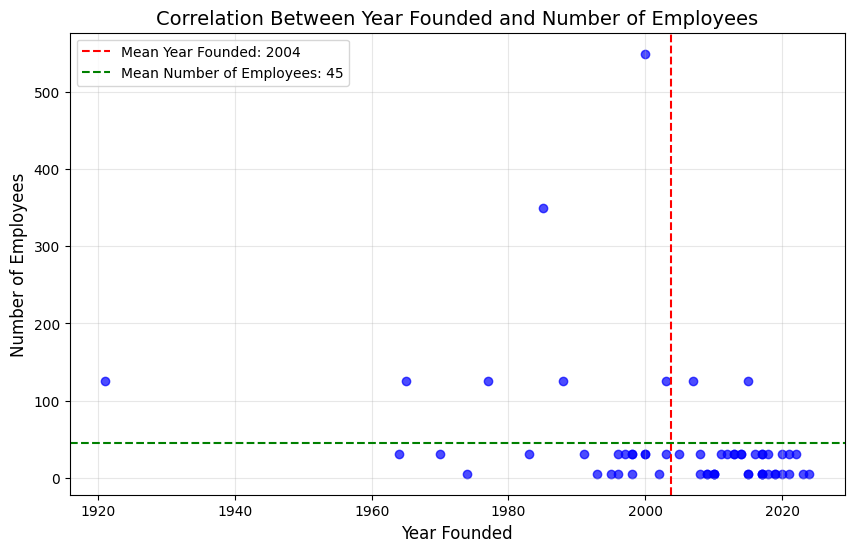

In [38]:
import numpy as np

# Calculate the correlation coefficient
correlation = df["Founded"].corr(df["Employees"])

print(f"Correlation between Year Founded and Number of Employees: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Founded"], df["Employees"], color="blue", alpha=0.7)

# Add labels and title
plt.title("Correlation Between Year Founded and Number of Employees", fontsize=14)
plt.xlabel("Year Founded", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.grid(alpha=0.3)

# Calculate the mean of the 'Founded' and 'Employees' columns
mean_year_founded = np.mean(df["Founded"])
mean_employees = np.mean(df["Employees"])

# Plot the average line (mean) for both axes
plt.axvline(x=mean_year_founded, color='red', linestyle='--', label=f'Mean Year Founded: {mean_year_founded:.0f}')
plt.axhline(y=mean_employees, color='green', linestyle='--', label=f'Mean Number of Employees: {mean_employees:.0f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

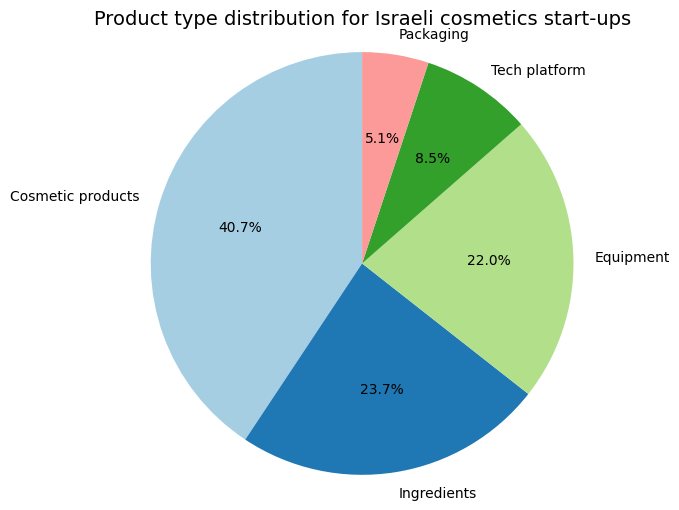

In [51]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'What' column
what_counts = df["What"].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(what_counts, labels=what_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Product type distribution for Israeli cosmetics start-ups", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


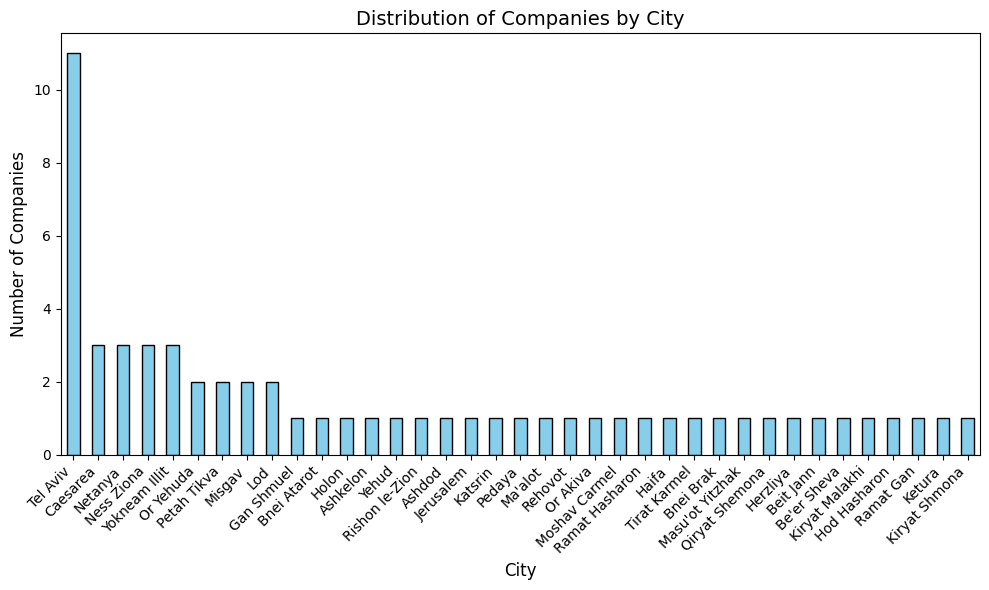

In [55]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique city in the 'City' column
city_counts = df["City"].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
city_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels and title
plt.title("Distribution of Companies by City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


In [57]:
# City Frequency Encoding: Assign each city a frequency based on its occurrence
city_freq = df['City'].value_counts()
df['City_encoded'] = df['City'].map(city_freq)

# Now, calculate the correlation between the encoded city values and "Founded"
correlation = df["City_encoded"].corr(df["Founded"])

print(f"Correlation between City Frequency and Year Founded: {correlation:.2f}")

Correlation between City Frequency and Year Founded: 0.26


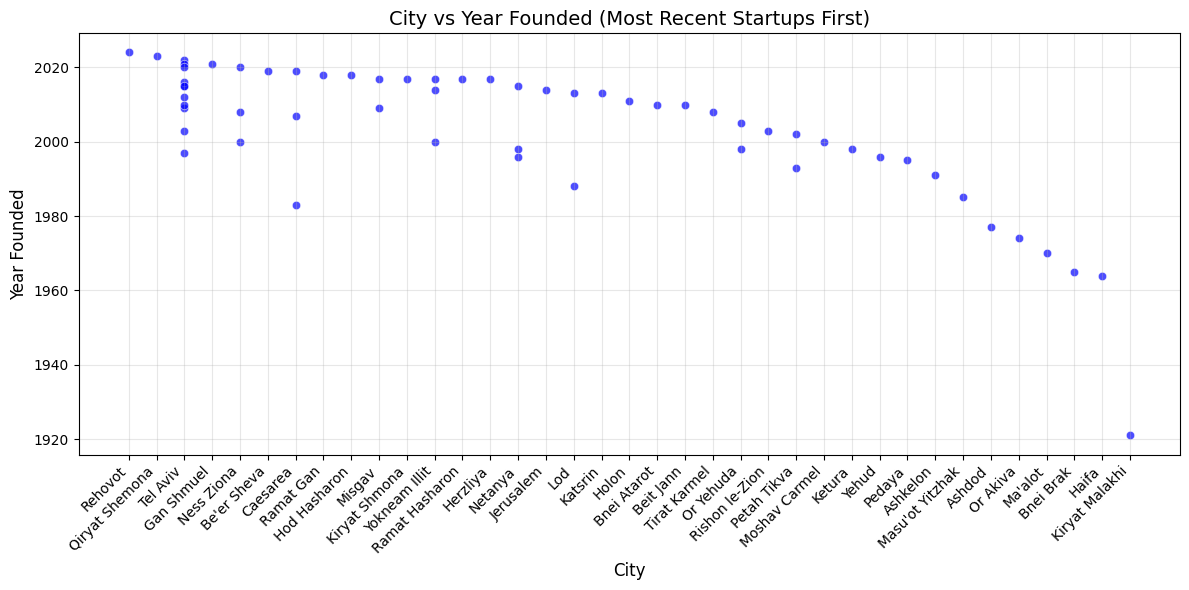

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'City' and get the most recent 'Founded' year for each city
latest_foundation = df.groupby('City', observed=False)['Founded'].max().reset_index()

# Sort cities by the most recent founded year in descending order
sorted_cities = latest_foundation.sort_values(by='Founded', ascending=False)['City']

# Reorder the DataFrame based on the sorted cities
df['City'] = pd.Categorical(df['City'], categories=sorted_cities, ordered=True)

# Scatter plot with cities on x-axis and years (founded) on y-axis
plt.figure(figsize=(12, 6))  # Increased the figure size for better readability
sns.scatterplot(x='City', y='Founded', data=df, color="blue", alpha=0.7)

# Add labels and title
plt.title("City vs Year Founded (Most Recent Startups First)", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Year Founded", fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate 45 degrees and align the text to the right

# Add grid for better visualization
plt.grid(alpha=0.3)

# Apply tight layout to prevent cut-off labels
plt.tight_layout()

# Show the plot
plt.show()